In [2]:
import numpy as np
import sklearn
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import pandas as pd




In [3]:
dat1 = np.genfromtxt("docword.nips.txt.gz", delimiter = "", skip_header= 3, dtype = int)

m1 = np.zeros((1500, 12419), dtype = int)


for p in dat1:
    m1[p[0]-1][p[1]-1] = p[2]
m1


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
dat1.shape 

(746316, 3)

In [5]:
jm = pairwise_distances(m1, metric='jaccard')
js = 1 - jm
js


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


array([[1.        , 0.16594828, 0.15555556, ..., 0.14587973, 0.14071856,
        0.00704225],
       [0.16594828, 1.        , 0.15025907, ..., 0.1492865 , 0.13378906,
        0.01038062],
       [0.15555556, 0.15025907, 1.        , ..., 0.14393939, 0.16749751,
        0.00453515],
       ...,
       [0.14587973, 0.1492865 , 0.14393939, ..., 1.        , 0.17248677,
        0.02746567],
       [0.14071856, 0.13378906, 0.16749751, ..., 0.17248677, 1.        ,
        0.00752688],
       [0.00704225, 0.01038062, 0.00453515, ..., 0.02746567, 0.00752688,
        1.        ]])

In [6]:
js = 1 - jm
dfra = pd.DataFrame(js)
dfra




,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,1.000000,0.165948,0.155556,0.171818,0.184632,0.135041,0.165259,0.135338,0.164229,0.182851,...,0.140312,0.143005,0.155340,0.136782,0.159715,0.148494,0.157513,0.145880,0.140719,0.007042
1,0.165948,1.000000,0.150259,0.164884,0.197452,0.124575,0.154930,0.157895,0.171301,0.168844,...,0.157778,0.159255,0.169409,0.130191,0.152239,0.135354,0.156983,0.149286,0.133789,0.010381
2,0.155556,0.150259,1.000000,0.155263,0.157681,0.121924,0.150463,0.129383,0.157952,0.136628,...,0.138528,0.147059,0.154502,0.146561,0.149606,0.164271,0.158907,0.143939,0.167498,0.004535
3,0.171818,0.164884,0.155263,1.000000,0.199461,0.115242,0.186255,0.113189,0.167748,0.155143,...,0.141682,0.158813,0.167492,0.158397,0.176724,0.168569,0.160900,0.131769,0.150547,0.012150
4,0.184632,0.197452,0.157681,0.199461,1.000000,0.140782,0.167243,0.152542,0.205128,0.174556,...,0.165577,0.158266,0.194203,0.173469,0.176587,0.164813,0.179513,0.164680,0.162268,0.010056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.148494,0.135354,0.164271,0.168569,0.164813,0.106638,0.144154,0.092166,0.127749,0.146860,...,0.165027,0.212924,0.172217,0.136714,0.183183,1.000000,0.183861,0.157838,0.205493,0.007839
1496,0.157513,0.156983,0.158907,0.160900,0.179513,0.127193,0.146232,0.121637,0.140461,0.161979,...,0.174482,0.200415,0.218627,0.132609,0.229897,0.183861,1.000000,0.168467,0.204431,0.019016
1497,0.145880,0.149286,0.143939,0.131769,0.164680,0.108491,0.133983,0.125323,0.128668,0.149068,...,0.248737,0.136170,0.179775,0.131673,0.165612,0.157838,0.168467,1.000000,0.172487,0.027466
1498,0.140719,0.133789,0.167498,0.150547,0.162268,0.104822,0.159822,0.109234,0.133266,0.150376,...,0.188578,0.227414,0.209724,0.139808,0.197446,0.205493,0.204431,0.172487,1.000000,0.007527


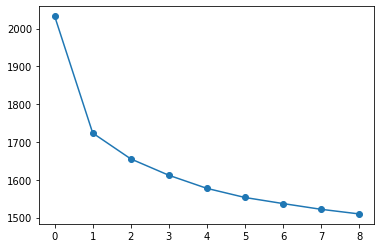

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
arr = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i,algorithm = "full",random_state=0,max_iter = 60).fit(js)
  arr.append(kmeans.inertia_)
plt.plot(arr,marker = 'o')
plt.show()


In [9]:
from sklearn.decomposition import PCA

centroids = KMeans(n_clusters=3,algorithm = "full",random_state=0,max_iter = 60).fit(js).cluster_centers_


In [10]:
centroids

array([[0.15520737, 0.15524894, 0.14175684, ..., 0.13836864, 0.14635232,
        0.0093431 ],
       [0.12784343, 0.13275525, 0.12167955, ..., 0.10443559, 0.11312185,
        0.0077668 ],
       [0.00874239, 0.01257749, 0.00969318, ..., 0.01390301, 0.00794509,
        0.13505548]])

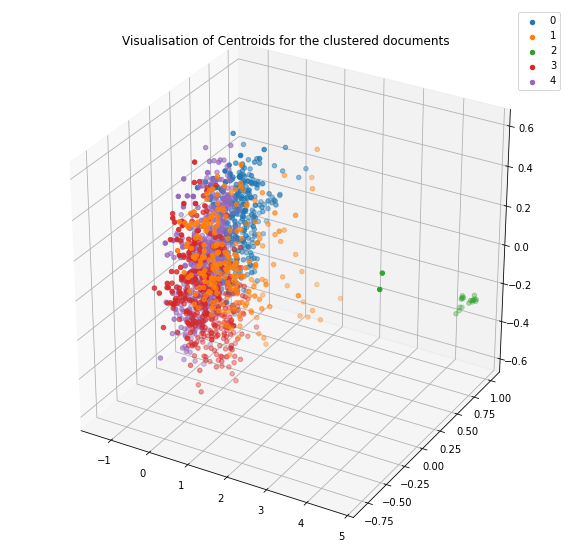

In [11]:
from sklearn.decomposition import PCA
#Centroids Visualisation
pca = PCA(3)
data = pca.fit_transform(js)
model = KMeans(n_clusters = 5, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
ax = plt.axes(projection ="3d")

for i in uniq:
   ax.scatter(data[label == i , 0] , data[label == i , 1] ,data[label ==i,2],label = i)
plt.scatter(centroids[:,0], centroids[:,1],centroids[:,2], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.title("Visualisation of Centroids for the clustered documents")

plt.legend()
plt.show()

In [12]:
from sklearn.metrics import davies_bouldin_score
dav = KMeans(n_clusters=4,algorithm = "full",random_state=0,max_iter = 60).fit(js)
davies_bouldin_score(js,labels = dav.fit_predict(js))

2.5580326696350246

In [13]:
import time
t1 = time.perf_counter()
dav = KMeans(n_clusters=5,algorithm = "full",random_state=0,max_iter = 60).fit(js)
tw = time.perf_counter() - t1
print(tw, "seconds")

2.79623420300004 seconds


In [16]:
from memory_profiler import profile
%load_ext memory_profiler

%memit dav=KMeans(n_clusters=5,random_state=42).fit(js)

peak memory: 448.38 MiB, increment: 0.00 MiB


In [15]:
pip install -U memory_profiler


  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=3b9ccfd4f48b06889465ccbaa91ec1b203281d69868b36e3e4a16def3af171cb
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler
